# Part I: From web

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request # I may be able to use this library to read the file
from math import exp, pi
%matplotlib inline

Request = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
output = urllib.request.urlopen(Request)
output1 = output.read().decode()

### Creating the Data

In [20]:
Data = np.fromstring(output1, dtype = 'float', sep = ' ')
#Transform this same data by overwriting it. Transform this into a 500 by 500 array
Data = np.reshape(Data, [501, 501])

### Let us print a portion of this data just to see what it looks like.

In [21]:
# I will choose like the first 10 rows and 10 columns to see if I have properly transformed it
print(Data[:10, :10])

[[1.         0.99980001 0.99920011 0.99820054 0.99680171 0.99500417
  0.99280864 0.990216   0.98722728 0.98384369]
 [0.99980001 0.99960003 0.99900017 0.99800067 0.99660193 0.99480451
  0.99260912 0.99001666 0.98702814 0.98364478]
 [0.99920011 0.99900017 0.99840043 0.99740113 0.99600267 0.9942056
  0.99201066 0.98941871 0.9864308  0.98304811]
 [0.99820054 0.99800067 0.99740113 0.99640216 0.99500417 0.9932077
  0.99101349 0.98842241 0.98543549 0.98205394]
 [0.99680171 0.99660193 0.99600267 0.99500417 0.99360682 0.9918112
  0.98961801 0.98702814 0.98404262 0.98066265]
 [0.99500417 0.99480451 0.9942056  0.9932077  0.9918112  0.99001666
  0.98782479 0.98523647 0.98225274 0.9788748 ]
 [0.99280864 0.99260912 0.99201066 0.99101349 0.98961801 0.98782479
  0.98563453 0.98304811 0.98006658 0.97669112]
 [0.990216   0.99001666 0.98941871 0.98842241 0.98702814 0.98523647
  0.98304811 0.98046394 0.977485   0.97411247]
 [0.98722728 0.98702814 0.9864308  0.98543549 0.98404262 0.98225274
  0.98006658 0.

The shape looks reasonable. Next, let's create some random number between 0 and 100, and then show the image.

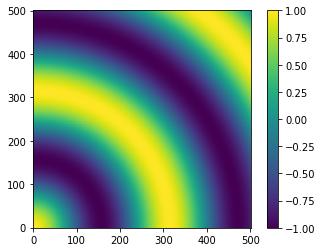

In [22]:
# show image
plt.imshow(Data, origin = 'lower')
plt.colorbar()
plt.savefig('/Users/coole/image1.png', format = 'png')

In [23]:
data1 = np.fft.fft2(Data)
#overwrite this same data
data1 = np.absolute(data1)

Now, I apply the logarithmic function on this data and then show the corresponding image using the same method we did on the previous image.

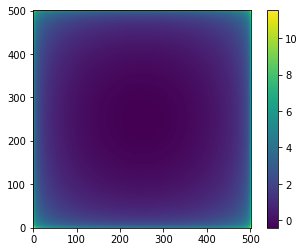

In [24]:
plt.imshow(np.log(data1), origin = 'lower')
plt.colorbar()
plt.savefig('/Users/coole/imagewithfft.png', format = 'png')

I am wondering what just happened. Based on what I see, the green and yellow color have been pulled from the center of the image and compressed on the edges, that we can barely see them on the sides.

Let us create a new array with random elements like we did earlier and do the exact same process. Let us create an array with about 100 elements in it.

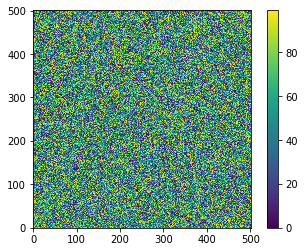

In [25]:
randomized = np.random.randint(100, size = (501, 501))
plt.imshow(randomized, origin = 'lower')
plt.colorbar()
plt.savefig('/Users/coole/randomizeddata.png', format = 'png')

This image looks very noisy, so what I will do next is, I will apply the fft function to this data and then do some compression with the absolute function, show the image, and see how it differs from this one. 

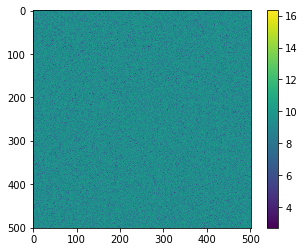

In [26]:
randomized = np.fft.fft2(randomized)
modified_data = np.absolute(randomized)
# apply the logarithm function just like earlier
plt.imshow(np.log(modified_data))
plt.colorbar()
plt.savefig('/Users/coole/randomizedwithfft.png', format = 'png')

As I expected, the noise would be mostly gone upon applying the fft function, because this is the nature of the Fourier Transform.

# Pho Vs Ramen Vs Soba(Worldwide)

I downloaded a data from googletrends. It shows how one of these three types of Asian foods are more preferred by people. 

In [3]:
Data = pd.read_csv('/Users/coole/googledata.csv', skiprows = 2)
print(Data[0:10])

     Month  Pho  Ramen  Soba
0  2004-01    5     45    10
1  2004-02    5     39    11
2  2004-03    5     33    11
3  2004-04    5     31    11
4  2004-05    5     34    11
5  2004-06    5     32    13
6  2004-07    5     34    12
7  2004-08    6     37    12
8  2004-09    6     37    12
9  2004-10    6     33    12


In [5]:
month = Data.Month
pho = Data.Pho
ramen = Data.Ramen
soba = Data.Soba

# I am not analyzing the data by comparing the three categories of food!!!

I only care to see how Fourier Transform should work. So I am just gonna grab one type of food and plot it against 'month', and plot some Fourier Transform effects. I am going to go with Ramen since it's my favorite of the three.

In [6]:
def dft(y):
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*pi*k*n/N)
    return c

def idft(c):
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*np.exp(2j*pi*k*n/N)
    return y

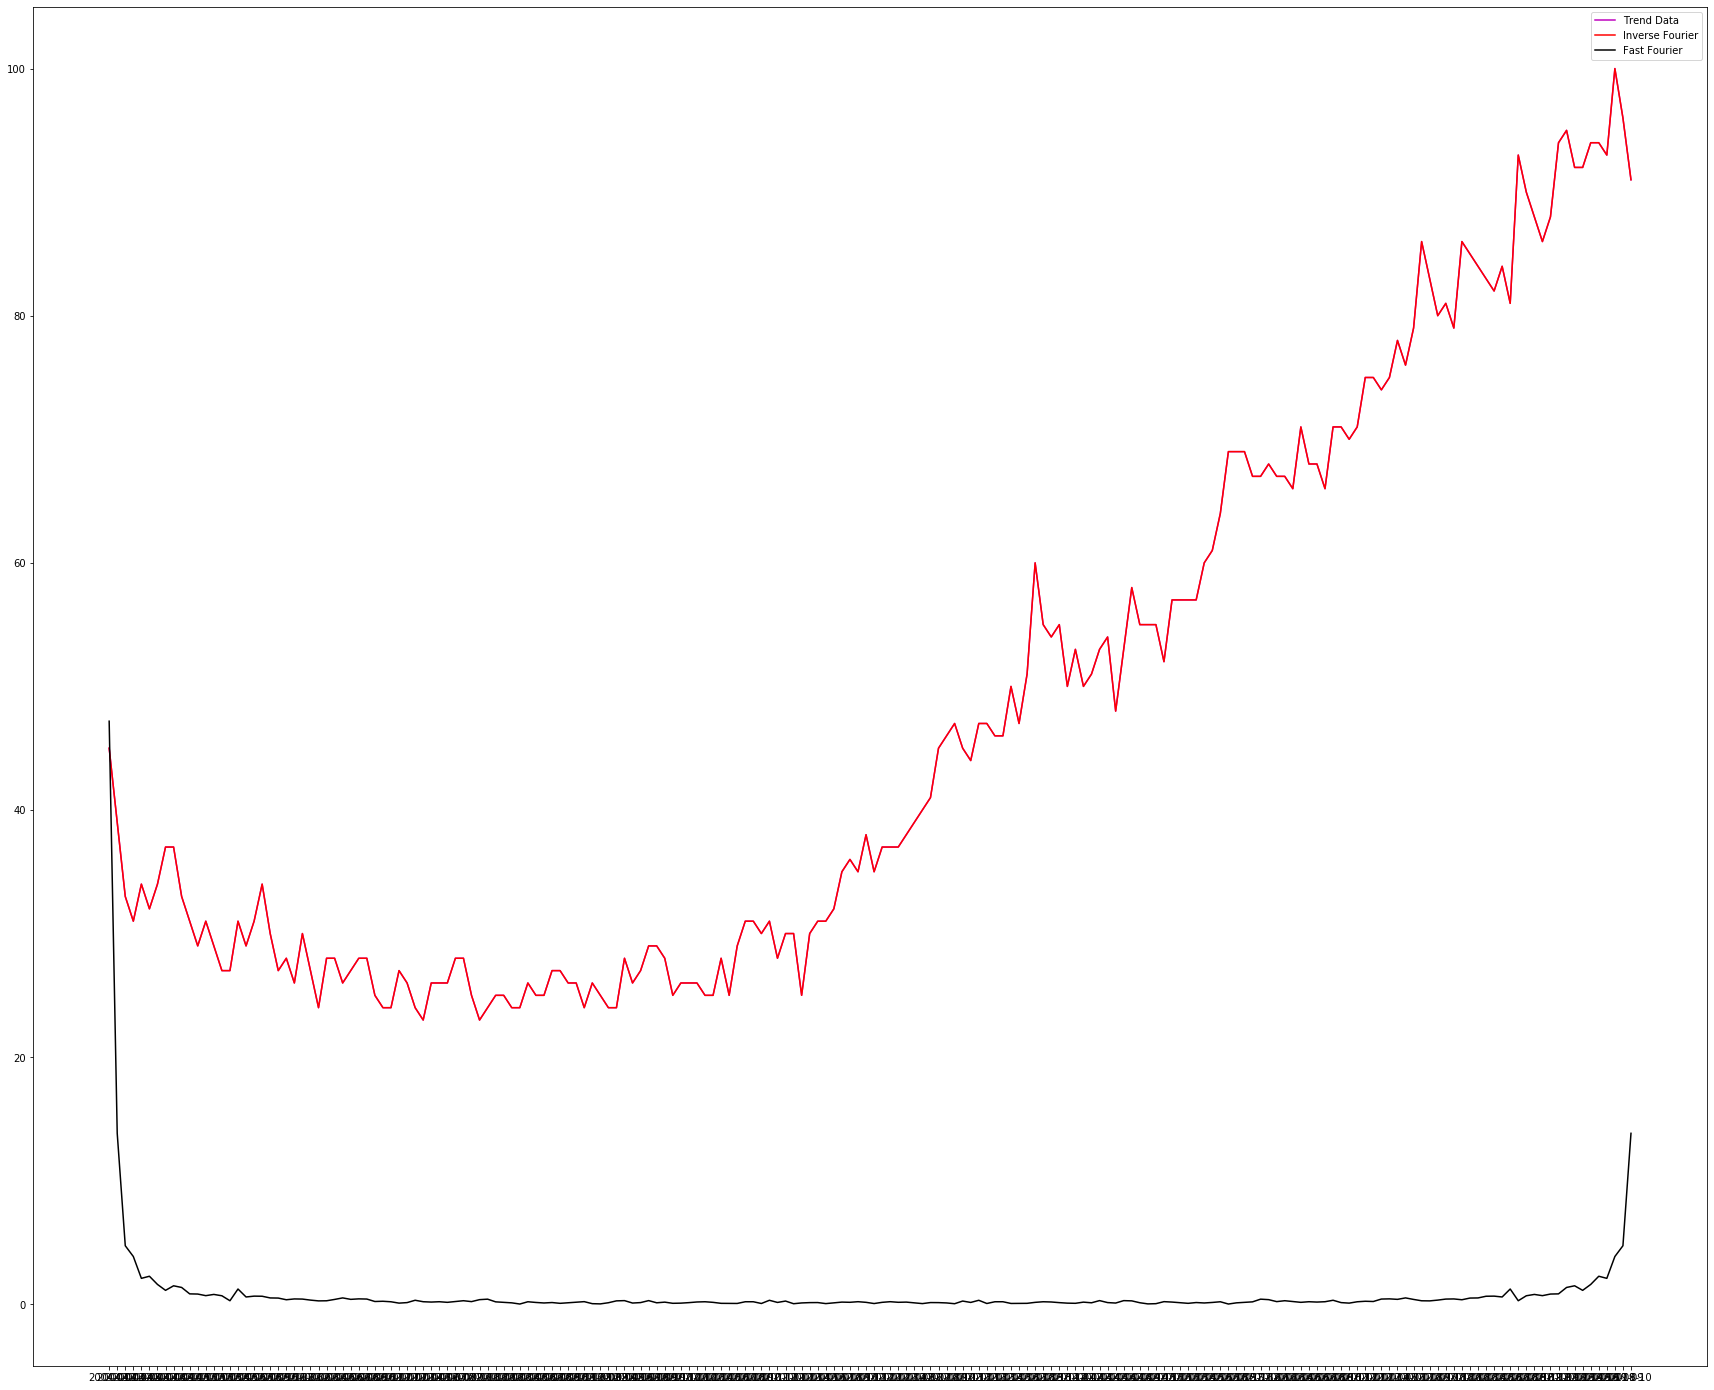

In [17]:
c = dft(ramen)
y1 = idft(c)/len(ramen)
y2 = np.fft.ifft(ramen) # fast fourier
y2 = np.abs(y2)

plt.rcParams['figure.figsize'] = (30, 25)
plt.plot(month, ramen, 'm', label = 'Trend Data')
plt.plot(month, y1, 'r', label = 'Inverse Fourier')
plt.plot(month, y2, 'k', label = 'Fast Fourier')
plt.legend()
plt.show()

The Trend Data and the Inverse Fourier seem to have overlapped.